In [18]:
from autoviml.Auto_NLP import Auto_NLP
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset,info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00',with_info=True,batch_size=-1)

In [3]:
dataset

{'train': {'data': {'customer_id': <tf.Tensor: shape=(85981,), dtype=string, numpy=
   array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
          b'35596948', b'29430209'], dtype=object)>,
   'helpful_votes': <tf.Tensor: shape=(85981,), dtype=int32, numpy=array([0, 3, 0, ..., 0, 0, 0])>,
   'marketplace': <tf.Tensor: shape=(85981,), dtype=string, numpy=array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object)>,
   'product_category': <tf.Tensor: shape=(85981,), dtype=string, numpy=
   array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
          b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
          b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
         dtype=object)>,
   'product_id': <tf.Tensor: shape=(85981,), dtype=string, numpy=
   array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
          b'B000NURPPK', b'B001EY5GNW'], dtype=object)>,
   'product_parent': <tf.Tensor: shape=(85981,), dtype

In [4]:
train_dataset = dataset['train']

In [5]:
dataset = tfds.as_numpy(train_dataset)

In [6]:
helpful_votes = dataset['data']['helpful_votes']
review_headline = dataset['data']['review_headline']
review_body = dataset['data']['review_body']
rating = dataset['data']['star_rating']

In [7]:
reviews_df = pd.DataFrame(np.hstack((helpful_votes[:,None],review_headline[:,None],review_body[:,None],rating[:,None])),
                 columns = ['votes','headline','reviews','rating'])

In [8]:
convert_dict = {'votes':int,'headline':str,'reviews':str,'rating':int}

In [9]:
reviews_df = reviews_df.astype(convert_dict)
reviews_df

,votes,headline,reviews,rating
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4
3,0,b'Five Stars',b'Top quality.',5
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3
...,...,...,...,...
85976,2,b'YES!',"b""This is the real deal. Don't bother with the...",5
85977,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have orde...,5
85978,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a n...",3
85979,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do muc...",2


In [12]:
reviews_df['rating'].value_counts()

5    48897
4    13657
1    11036
3     7050
2     5341
Name: rating, dtype: int64

In [10]:
train,test = train_test_split(reviews_df,test_size=0.3)

Auto NLP processing on NLP Column: reviews
Shape of Train Data: 60186 rows
    Shape of Test Data: 25795 rows


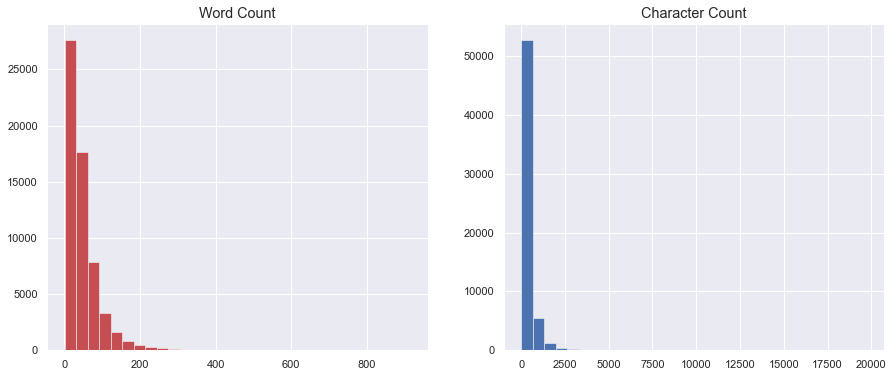

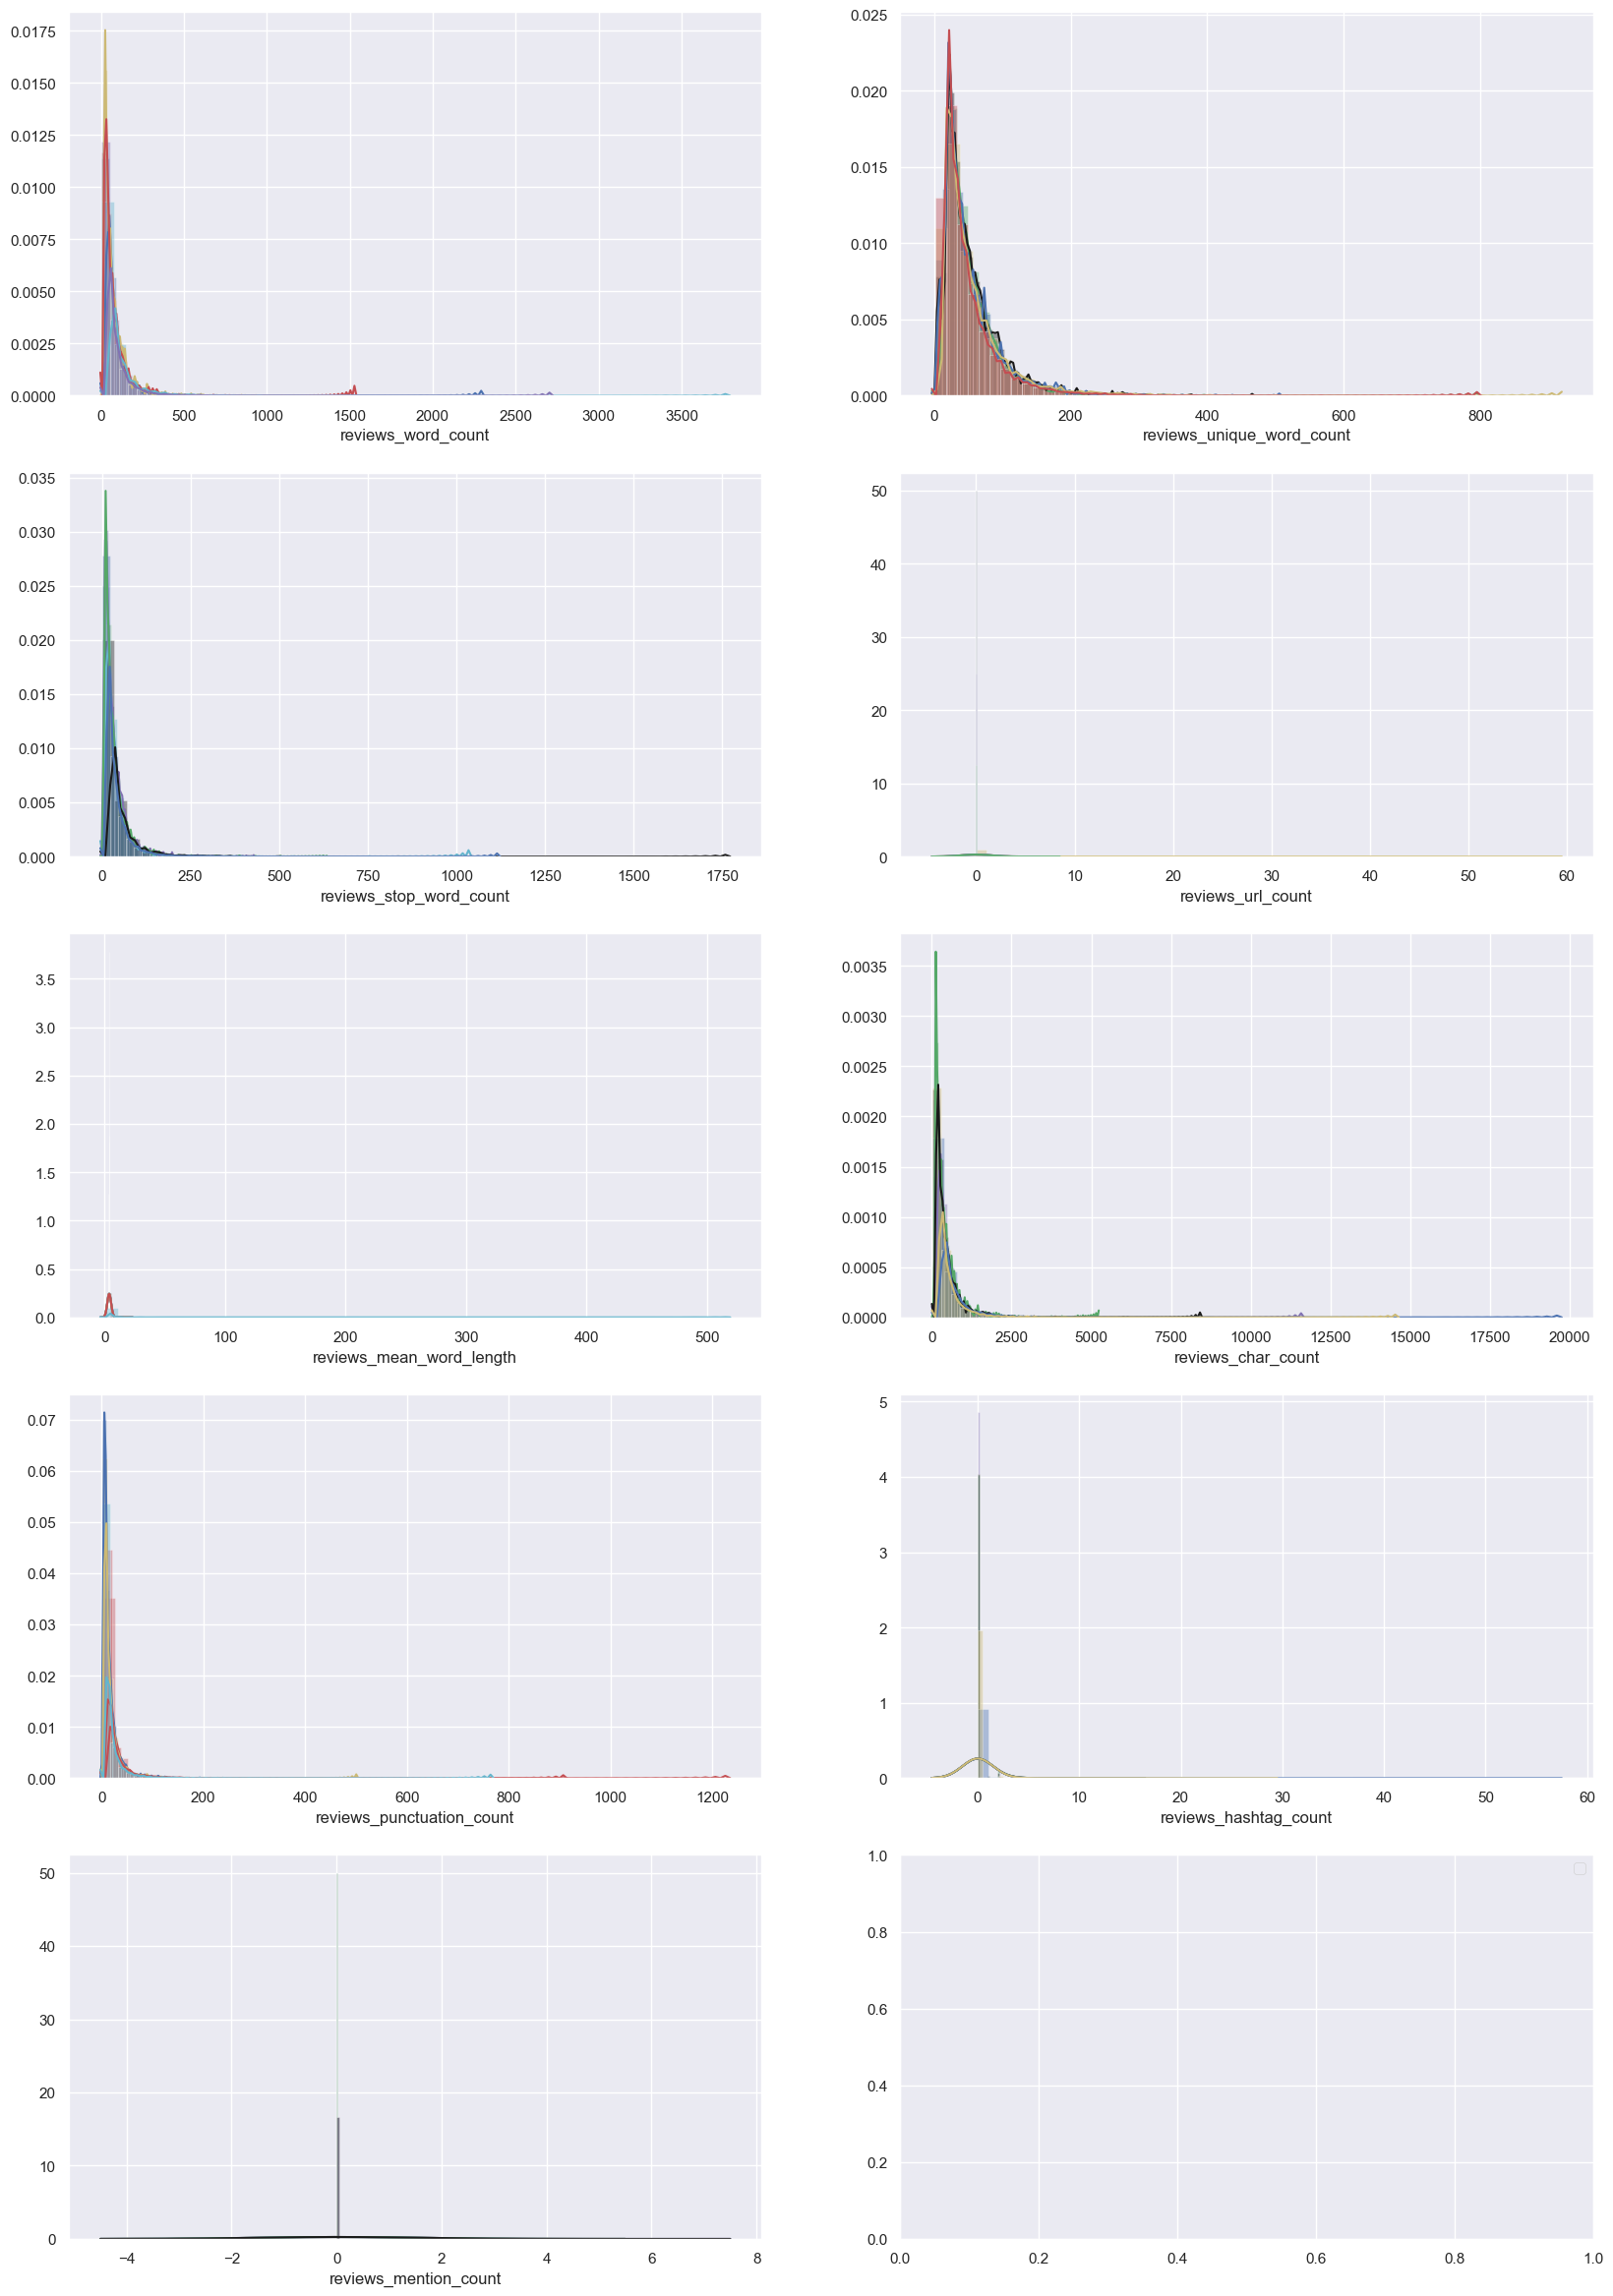

    Added 9 summary columns for counts of words and characters in each row
    Cleaning text in reviews before doing transformation...
Cleaning text in Train data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Train data = 10 seconds
        Time Taken for Processing text in Train data = 383 seconds
            Time Taken for Stopword removal in Train data = 44 seconds
    Cleaning text in reviews before doing transformation...
Cleaning text in Test data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Test data = 4 seconds
        Time Taken for Processing text in Test data = 163 seconds
            Time Taken for Stopword removal in Test data = 19 seconds
Train and Test data Text cleaning completed. Time taken = 185 seconds
    A U T O - N L P   P R O C E S S I N G  O N   N L P   C O L U M N = reviews 
#################################################################################
Generating

Transforming train and cross validation data sets into Vectorized form. This will take time...
    Time taken to transform train data into vectorized data = 7.92 seconds
    Train Vectorized data shape = (48148, 5192), Cross Validation data shape = (12038,)


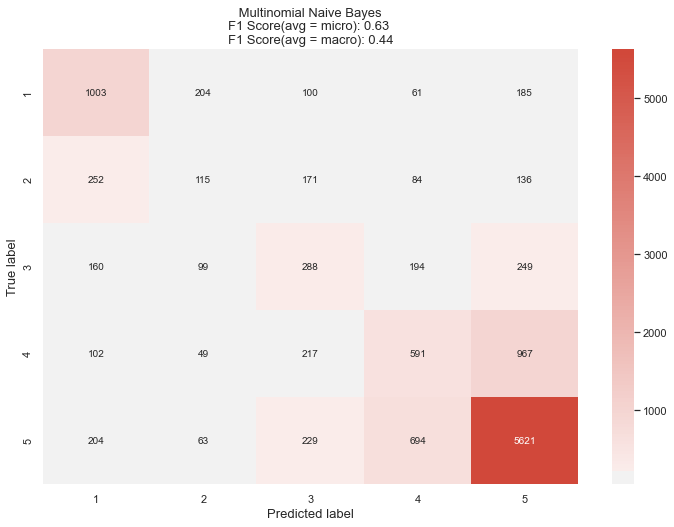

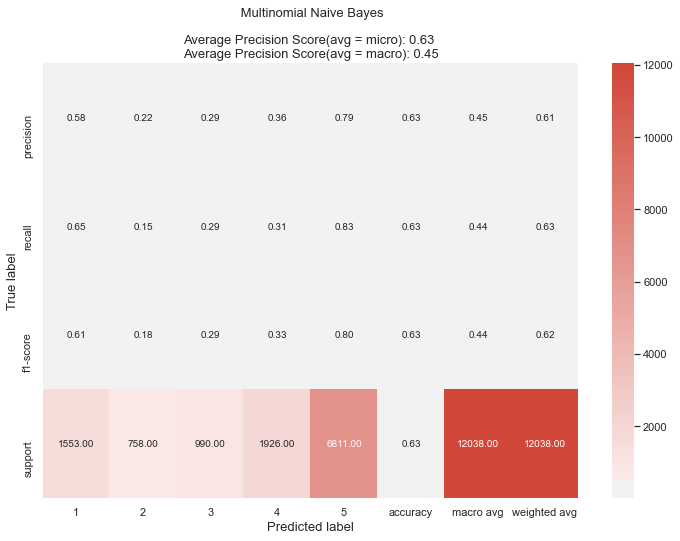

Training Pipeline on full Train data. This will take time...
Training completed. Time taken for Auto_NLP = 12.4 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [17]:
nlp_column = 'reviews'
target = 'rating'
train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(nlp_column,train,test,target,score_type='balanced_accuracy',
                                                      modeltype='Classification',top_num_features=100,verbose=2,build_model=True)

In [13]:
nlp_transformer

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.5, max_features=5192, min_df=2,
                                 ngram_range=(1, 3), strip_accents='unicode',
                                 token_pattern='\\w{1,}')),
                ('multinomialnb', MultinomialNB(alpha=0.8080499633648477))])

In [14]:
nlp_transformer.predict(test[nlp_column])

array([5, 3, 5, ..., 5, 4, 5])

In [19]:
accuracy = accuracy_score(test['rating'],nlp_transformer.predict(test[nlp_column]))

In [20]:
accuracy

0.6116689280868385